GradCAM++ on resnet50

In [14]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import preprocess_image, show_cam_on_image


In [16]:
# Load a pretrained ResNet model
model = models.resnet50(pretrained=True) #for ResNet
# model = models.vgg16(pretrained=True) #for VGG16
model.eval()

# Choose the target layer for GradCAM++
target_layer = model.layer4[-1].conv2  # The last convolutional layer in ResNet
# target_layer = model.features[28]  # The last convolutional layer in VGG16

In [17]:
print(target_layer)

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [18]:
# Load the image
image_path = "/mnt/nvme_disk2/User_data/nb57077k/project/Screenshot from 2025-03-11 14-29-13.png"  # Change this to your image path
image = Image.open(image_path).convert("RGB")

# Define image preprocessing transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension


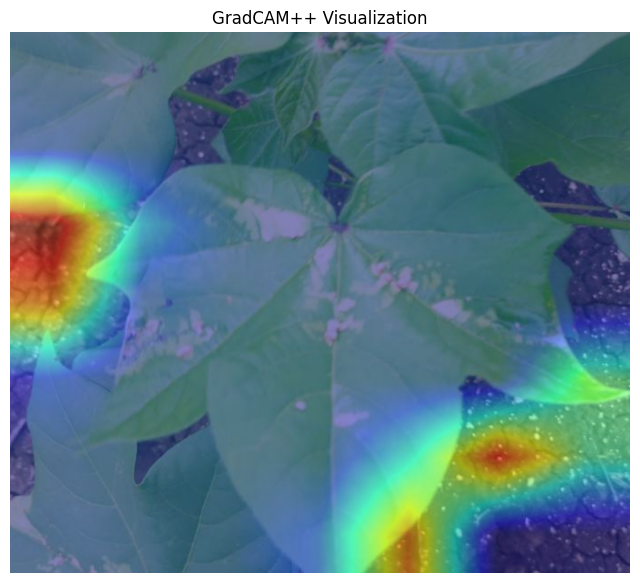

In [19]:
import cv2
# Initialize GradCAM++ with the target model and layer
cam = GradCAMPlusPlus(model=model, target_layers=[target_layer])

# Compute GradCAM heatmap
grayscale_cam = cam(input_tensor=input_tensor)[0]  # Get first image result


# Resize the heatmap to match the original image size
heatmap_resized = cv2.resize(grayscale_cam, (image.width, image.height))

# Convert image to NumPy array and normalize
rgb_img = np.array(image) / 255.0  

# Overlay GradCAM++ heatmap on the original image
visualization = show_cam_on_image(rgb_img, heatmap_resized, use_rgb=True)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(visualization)
plt.axis('off')
plt.title("GradCAM++ Visualization")
plt.show()



In [20]:
print(target_layer)

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


GradCAM on ResNet50

In [21]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, preprocess_image


In [22]:
# Load a pretrained ResNet model
model = models.resnet50(pretrained=True)
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [23]:
# Select layers from different ResNet blocks
target_layers = [
    model.layer1[-1].conv2,  # Layer 1 (Shallow features)
    model.layer2[-1].conv2,  # Layer 2
    model.layer3[-1].conv2,  # Layer 3
    model.layer4[-1].conv2   # Layer 4 (Deep features)
]


In [24]:
# Load an image
image_path = "/mnt/nvme_disk2/User_data/nb57077k/project/Screenshot from 2025-03-11 14-29-13.png"  # Change this to your image
image = Image.open(image_path).convert("RGB")

# Define image transformations (Resize to 224x224 for ResNet)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Preprocess the image
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension


Applying GradCAM on Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)...


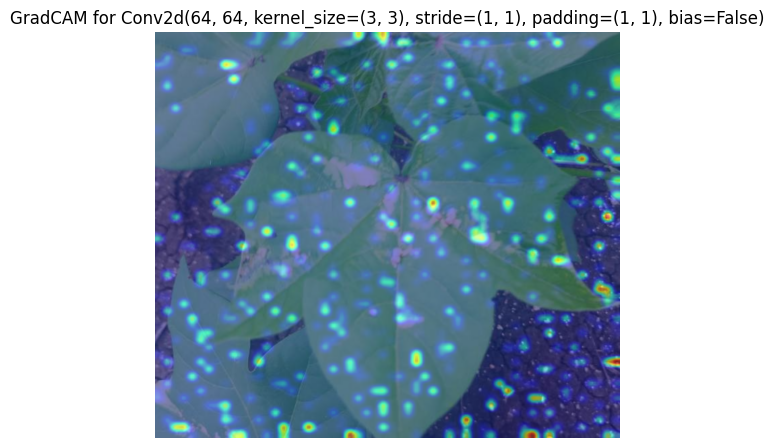

Applying GradCAM on Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)...


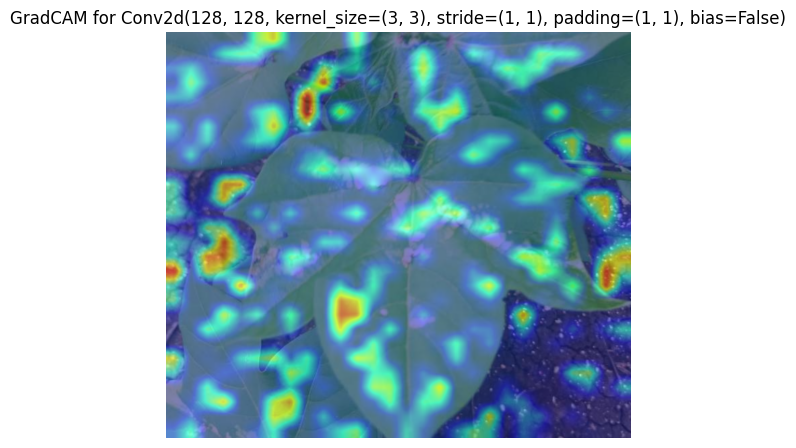

Applying GradCAM on Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)...


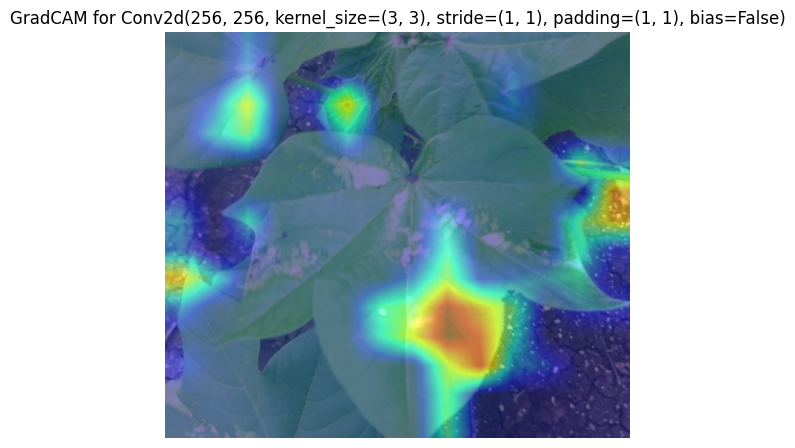

Applying GradCAM on Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)...


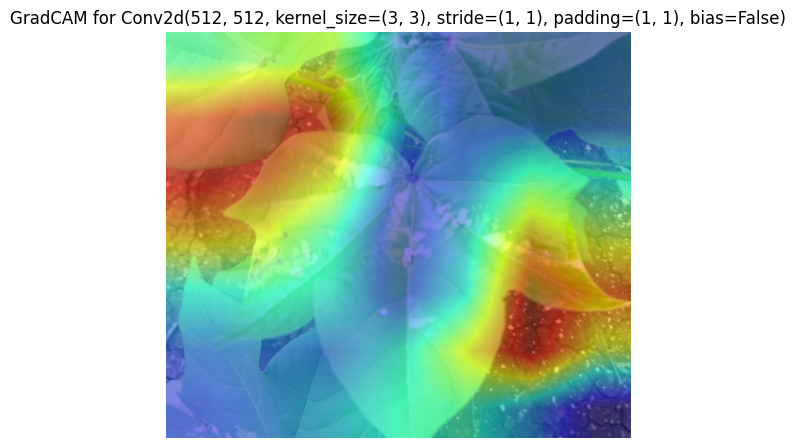

In [25]:
for layer in target_layers:
    print(f"Applying GradCAM on {layer}...")

    # Initialize GradCAM
    cam = GradCAM(model=model, target_layers=[layer])

    # Generate GradCAM heatmap
    grayscale_cam = cam(input_tensor=input_tensor)[0]  # Get the heatmap

    # Resize heatmap to match the original image
    heatmap_resized = cv2.resize(grayscale_cam, (image.width, image.height))

    # Convert image to NumPy array
    rgb_img = np.array(image) / 255.0

    # Overlay GradCAM heatmap on the original image
    visualization = show_cam_on_image(rgb_img, heatmap_resized, use_rgb=True)

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(visualization)
    plt.axis("off")
    plt.title(f"GradCAM for {layer}")
    plt.show()


LRP on ResNet50

In [26]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from captum.attr import LRP
from captum.attr import visualization as viz

In [27]:
model = models.resnet50(pretrained=True)

/mnt/nvme_disk2/User_data/nb57077k/miniconda3/envs/harsh/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/mnt/nvme_disk2/User_data/nb57077k/miniconda3/envs/harsh/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [28]:
# Load an image
image_path = "/mnt/nvme_disk2/User_data/nb57077k/project/Screenshot from 2025-03-11 14-29-13.png"  # Change this to your image
image = Image.open(image_path).convert("RGB")

# Define preprocessing for ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0)  # Add batch dimension
input_tensor.requires_grad = True  # Needed for LRP

# Select a target layer for LRP (typically the last convolutional layer)
target_layer = model.layer4[-1].conv2

# Initialize LRP
lrp = LRP(model)

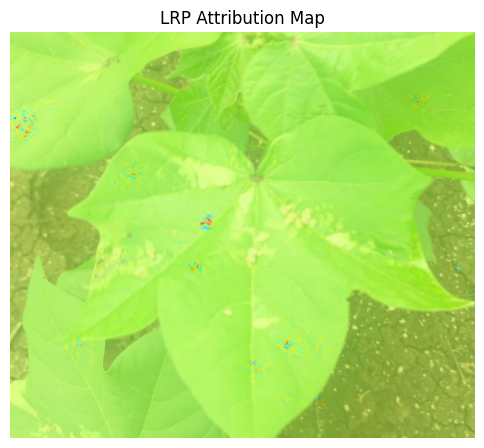

In [29]:
# Compute attributions
attributions = lrp.attribute(input_tensor, target=985)  # Change target index if needed

# Convert attributions to NumPy and resize
attributions = attributions.squeeze().detach().numpy()
attributions = np.mean(attributions, axis=0)  # Aggregate across channels
attributions = cv2.resize(attributions, (image.width, image.height))

# Normalize attributions
attributions = (attributions - np.min(attributions)) / (np.max(attributions) - np.min(attributions))

# Apply heatmap
heatmap = cv2.applyColorMap(np.uint8(255 * attributions), cv2.COLORMAP_JET)
original_img = np.array(image)

# Blend heatmap with original image
blended = cv2.addWeighted(original_img, 0.5, heatmap, 0.5, 0)

# Display result
plt.figure(figsize=(6, 6))
plt.imshow(blended)
plt.axis("off")
plt.title("LRP Attribution Map")
plt.show()
